Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.9020 - loss: 0.3196 - val_accuracy: 0.9825 - val_loss: 0.0549
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9896 - val_loss: 0.0287
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9873 - val_loss: 0.0386
Epoch 4/5


KeyboardInterrupt: 

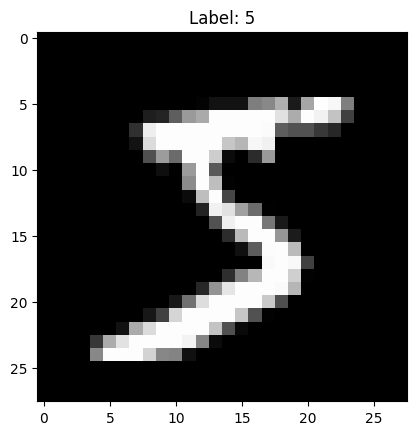

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
from google.colab import files

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data for CNN: (28, 28, 1) to include channel dimension
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize to [0,1]
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Display a sample image
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.title(f"Label: {y_train[0]}")
#plt.show()

# Step 2: Build a CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model with validation
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 4: Plot training performance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Step 6: Save the model
model.save('mnist_cnn_classifier.h5')
print("Model saved successfully!")

# Step 7: Upload and classify a custom image
digit_to_name = {i: str(i) for i in range(10)}  # Map digit labels to names

uploaded = files.upload()  # Upload an image

image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = np.array(image)

# Image Preprocessing
image = cv2.resize(image, (28, 28))  # Resize to match MNIST size
image = cv2.bitwise_not(image)  # Invert colors (if necessary)
image = image / 255.0  # Normalize
image = image.reshape(1, 28, 28, 1)  # Reshape for CNN input

plt.imshow(image.squeeze(), cmap='gray')
plt.title("Processed Image")
plt.show()

# Predict using the model
predictions = model.predict(image)
predicted_label = predictions.argmax()
confidence = predictions[0][predicted_label] * 100  # Confidence level

print(f"Predicted Label: {predicted_label} (Name: {digit_to_name[predicted_label]})")
print(f"Confidence Level: {confidence:.2f}%")
